In [149]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 1000

In [3]:
root_path = os.path.dirname(os.path.abspath(''))
data_path = os.path.join(root_path, 'data')
df = pd.read_parquet(os.path.join(data_path, 'df_analise_fundamentalista.parquet'))

In [4]:
df.shape

(802, 327)

## Removendo colunas com base na quantidade de nulos

In [5]:
df_missing_values = df.isna().sum().sort_values(ascending=False).to_frame().reset_index()
df_missing_values.columns = ['column', 'total_nan']

# Removendo as colunas default do processo
exclude_columns = ['asOfDate','currencyCode', 'periodType','symbol']
df_missing_values = df_missing_values[~df_missing_values['column'].isin(exclude_columns)]

In [6]:
ratio = 5
total_rows = df.shape[0]

min_rows = int((ratio *  total_rows) / 100)
print(min_rows)

40


In [7]:
print(len(df_missing_values[df_missing_values['total_nan'] <= min_rows]))
df_missing_values[df_missing_values['total_nan'] <= min_rows]

47


,column,total_nan
276,GoodwillAndOtherIntangibleAssets,40
277,InterestExpense,33
278,LongTermDebtAndCapitalLeaseObligation,24
279,ReconciledDepreciation,19
280,SellingGeneralAndAdministration,16
281,NetIncomeFromContinuingOperations,14
282,TaxProvision,13
283,TotalDebt,13
284,ChangeInCashSupplementalAsReported,12
285,InvestingCashFlow,12


In [8]:
valid_columns = list(df_missing_values[df_missing_values['total_nan'] <= min_rows]['column'])

## Heat map

In [9]:
# Criando DF oara corr
df_fundamentalista = df[['symbol', 'asOfDate'] + valid_columns]

In [138]:
df_history = pd.read_parquet(os.path.join(data_path, 'df_history.parquet'))
df_history = df_history[['symbol', 'close', 'date']]

In [139]:
df_fundamentalista = df_fundamentalista[df_fundamentalista['asOfDate'] < '2021-05-17'].copy()
df_history = df_history[df_history['date'] >= df_fundamentalista['asOfDate'].min()].copy()
df_history = df_history[df_history['date'] <= df_fundamentalista['asOfDate'].max()].copy()


In [140]:
df_history[df_history['symbol'] == 'AALR'].head()

,symbol,close,date
256,AALR,10.50,2020-06-01
257,AALR,10.26,2020-06-02
258,AALR,11.00,2020-06-03
259,AALR,11.55,2020-06-04
260,AALR,11.80,2020-06-05


In [141]:
df_fundamentalista.head(4)

,symbol,asOfDate,GoodwillAndOtherIntangibleAssets,InterestExpense,LongTermDebtAndCapitalLeaseObligation,ReconciledDepreciation,SellingGeneralAndAdministration,NetIncomeFromContinuingOperations,TaxProvision,TotalDebt,...,OperatingRevenue,NormalizedIncome,NetTangibleAssets,NetIncomeIncludingNoncontrollingInterests,NetIncomeFromContinuingOperationNetMinorityInterest,NetIncomeFromContinuingAndDiscontinuedOperation,NetIncomeContinuousOperations,NetIncomeCommonStockholders,NetIncome,DilutedNIAvailtoComStockholders
0,AALR,2020-06-30,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,1154007000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00
1,AALR,2020-09-30,965568000.00,13057000.00,622846000.00,28963000.00,40655000.00,-1873000.00,5896000.00,1048543000.00,...,259433000.00,-14463840.00,211114000.00,-1873000.00,-3855000.00,-3855000.00,-1873000.00,-3855000.00,-3855000.00,-3855000.00
2,AALR,2020-12-31,964517000.00,14525000.00,743054000.00,31421000.00,47059000.00,14571000.00,6759000.00,1045668000.00,...,292917000.00,14775481.46,226020000.00,14572000.00,12737000.00,12737000.00,14572000.00,12737000.00,12737000.00,12737000.00
3,AALR,2021-03-31,966307000.00,16642000.00,736475000.00,30862000.00,57573000.00,12530000.00,2701000.00,1052991000.00,...,285180000.00,9210408.00,234709000.00,12530000.00,10119000.00,10119000.00,12530000.00,10119000.00,10119000.00,10119000.00


In [142]:
for symbol in tqdm(df_fundamentalista['symbol'].unique()):
    for _, row in df_fundamentalista[df_fundamentalista['symbol'] == symbol].iterrows():
        for col in df_fundamentalista.columns[2:]:
            df_history.loc[
                (df_history['symbol'] == symbol) &
                (df_history['date'] >=row['asOfDate']),
                col
            ] = row[col]

100%|██████████| 197/197 [02:28<00:00,  1.32it/s]


In [145]:
df_history = df_history.dropna()

In [147]:
df_history.head()

,symbol,close,date,GoodwillAndOtherIntangibleAssets,InterestExpense,LongTermDebtAndCapitalLeaseObligation,ReconciledDepreciation,SellingGeneralAndAdministration,NetIncomeFromContinuingOperations,TaxProvision,...,OperatingRevenue,NormalizedIncome,NetTangibleAssets,NetIncomeIncludingNoncontrollingInterests,NetIncomeFromContinuingOperationNetMinorityInterest,NetIncomeFromContinuingAndDiscontinuedOperation,NetIncomeContinuousOperations,NetIncomeCommonStockholders,NetIncome,DilutedNIAvailtoComStockholders
276,AALR,10.29,2020-06-30,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00
277,AALR,10.37,2020-07-01,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00
278,AALR,10.10,2020-07-02,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00
279,AALR,10.16,2020-07-03,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00
280,AALR,10.97,2020-07-06,964561000.00,14325000.00,569255000.00,29169000.00,42598000.00,-85098000.00,5543000.00,...,140574000.00,-93995380.00,215202000.00,-85100000.00,-84628000.00,-84628000.00,-85099000.00,-84628000.00,-84628000.00,-84628000.00


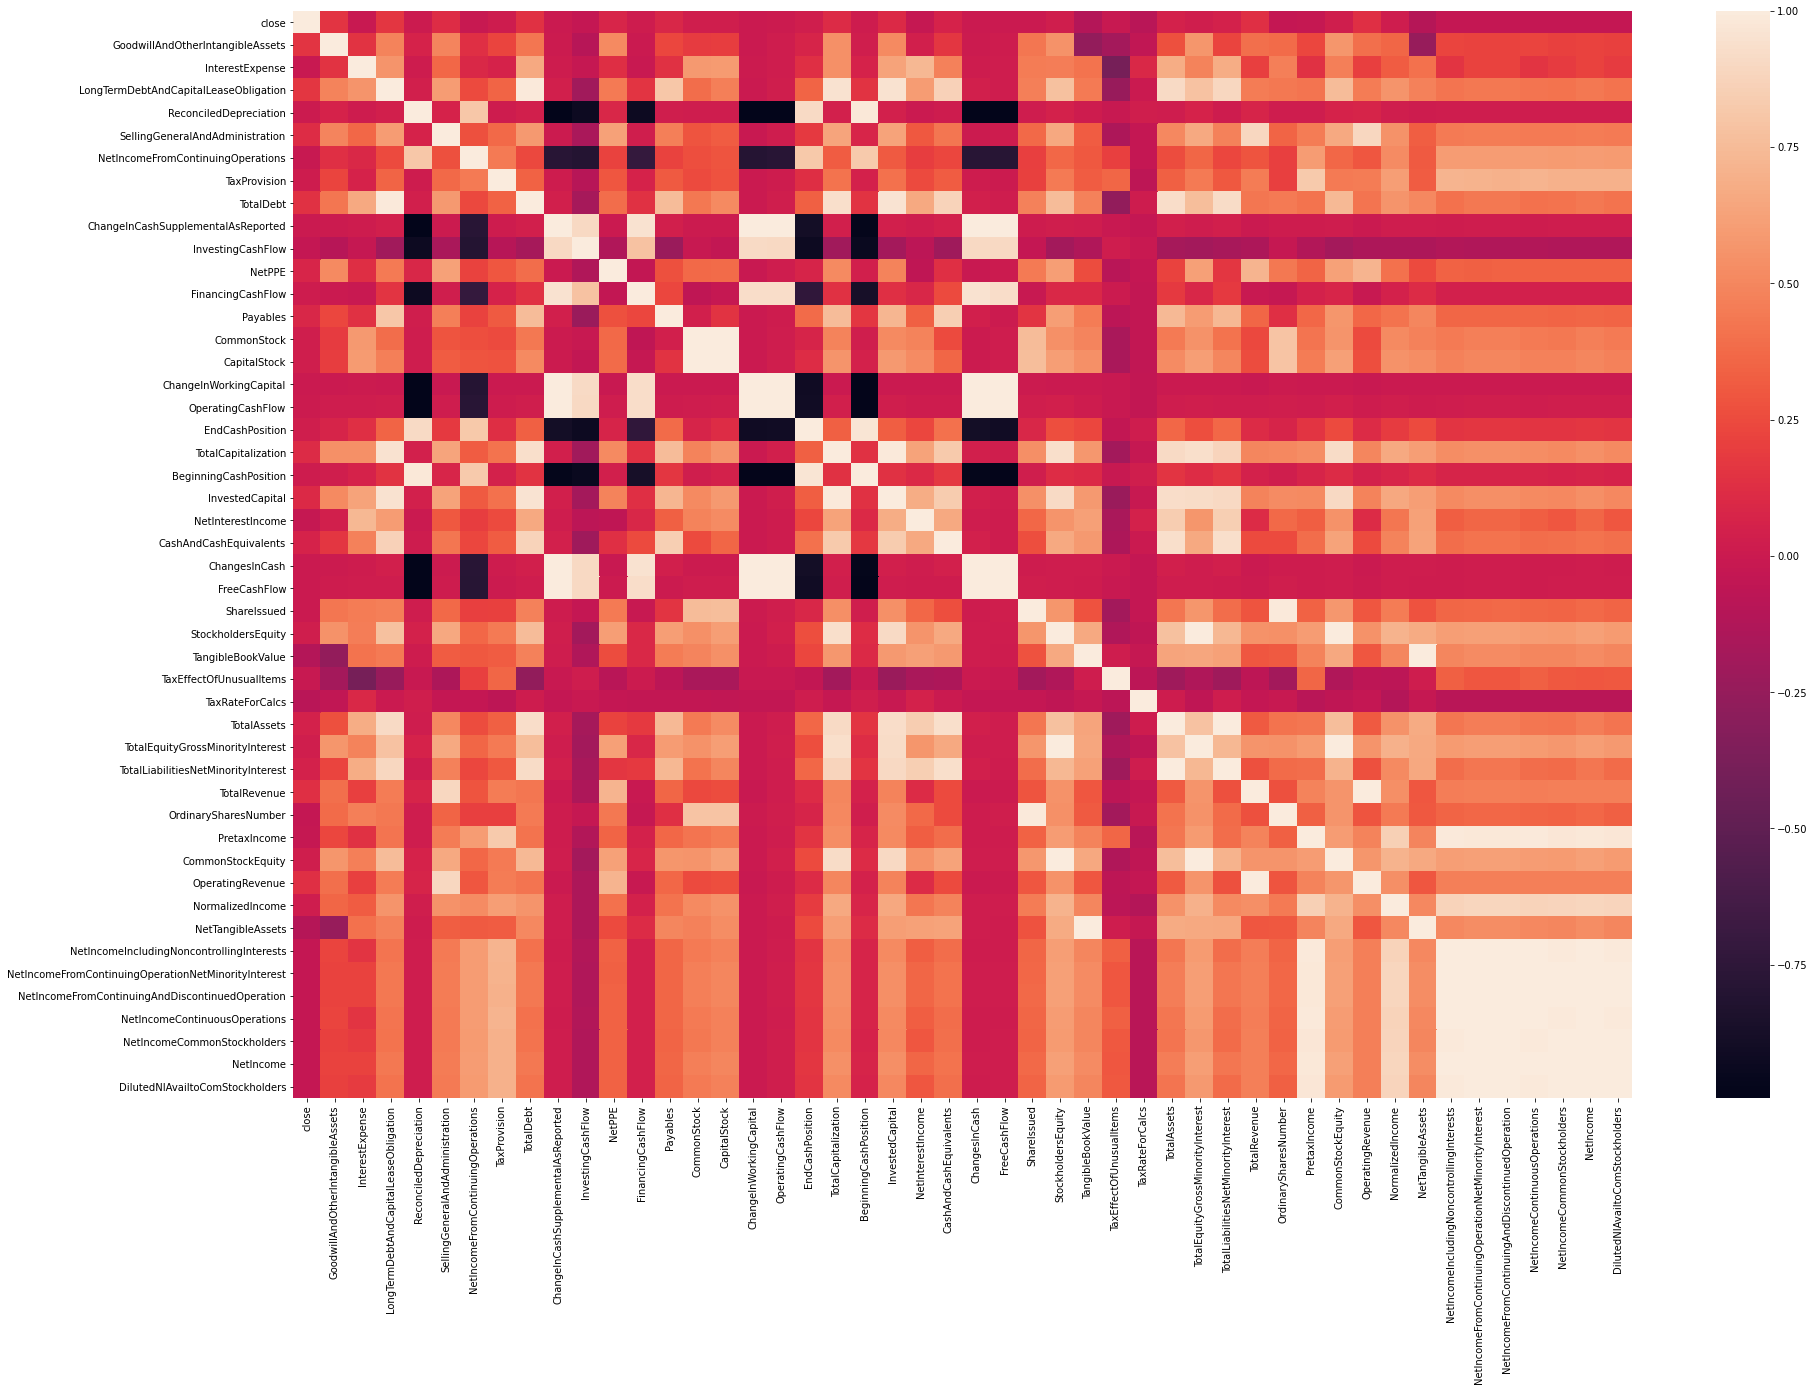

In [158]:
plt.figure(figsize = (30,20))
cor = df_history.corr()
sns.heatmap(cor)
plt.show()

In [25]:
def calc(com_atributos, sem_atributos):
    diff = sem_atributos / com_atributos
    print(round((1 - diff) * 100, 2))

In [29]:


sem_atributos = 22.3005
com_atributos = 19.4946
calc(com_atributos, sem_atributos)

-14.39
